In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

warnings.filterwarnings("ignore")

In [2]:
# Reading the data
df = pd.read_csv('./data/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Phân tích cột Temp3pm nên sẽ bỏ các cột Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow**

In [4]:
# Loại bỏ các cột không cần thiết
columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
df_predict = df.drop(columns=columns_to_drop)

In [5]:
df_predict

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [6]:
# Missing values for numeric data
numeric_col = df_predict.describe().columns.to_list()
df_predict[numeric_col].isnull().mean()*100

MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustSpeed     7.055548
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
dtype: float64

**Evaporation, Sunshine, Cloud9am and Cloud3pm have large missing values, so we will first look at these features and then handle the missing values for remaing numeric features.**

Text(0.5, 0.98, 'Features having high missing values (>35%)')

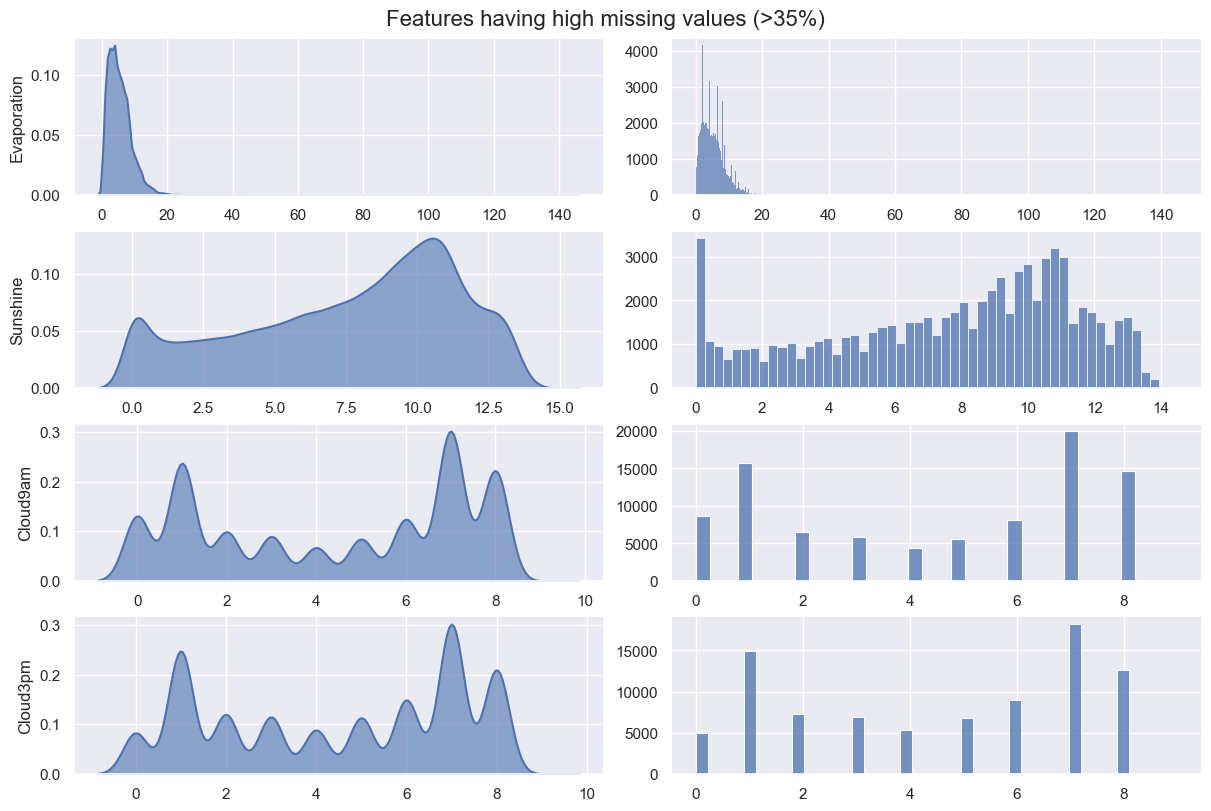

In [8]:
# Let's explore the features having high missing values
cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

sns.set()
fig, ax = plt.subplots(4,2, figsize = (12, 8), constrained_layout = True)

for i, num_var in enumerate(cols): 
    sns.kdeplot(data = df_predict, x = num_var, ax = ax[i][0],
                fill = True, alpha = 0.6, linewidth = 1.5)
    ax[i][0].set_ylabel(num_var)
    ax[i][0].set_xlabel(None)
    
    sns.histplot(data = df_predict, x = num_var, ax = ax[i][1])
    ax[i][1].set_ylabel(None)
    ax[i][1].set_xlabel(None)
    
fig.suptitle('Features having high missing values (>35%)', size = 16)

**Except Evaporation, all other three have distributed data, so we will impute the missing values with the median, and impute missing values forEvaporation with mean.**

In [9]:
for dataframe in [df_predict]:
    for cols in ['Sunshine', 'Cloud9am', 'Cloud3pm']:
        dataframe[cols].fillna(df_predict[cols].median(), inplace = True)

    dataframe['Evaporation'].fillna(df_predict['Evaporation'].mean(), inplace = True)

**Now I will remove the missing values from the remaining numerical features as they are <10%. One can also impute them with mean/ median whichever is appropriate.**

In [10]:
df_predict.dropna(inplace = True)

In [11]:
# Missing values for numeric data
numeric_col = df_predict.describe().columns.to_list()
df_predict[numeric_col].isnull().mean()*100

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64

In [14]:
# Chia dữ liệu thành features (X) và target (y)
X = df_predict.drop(columns=['Temp3pm'])
y = df_predict['Temp3pm']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Model Predict**

In [17]:
# Creating the FNN
model = Sequential()

# Layers
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='linear'))

# Compiling the FNN
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Fitting the FNN to the Training set
model.fit(X_train_scaled, y_train, epochs=50, verbose=1)


Epoch 1/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 4s 900us/step - accuracy: 0.0000e+00 - loss: 183.4768
Epoch 2/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - accuracy: 0.0000e+00 - loss: 59.8418
Epoch 3/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - accuracy: 0.0000e+00 - loss: 45.0079
Epoch 4/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 910us/step - accuracy: 0.0000e+00 - loss: 36.4808
Epoch 5/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 926us/step - accuracy: 0.0000e+00 - loss: 30.1144
Epoch 6/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.0000e+00 - loss: 25.0304
Epoch 7/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.0000e+00 - loss: 20.9855
Epoch 8/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 900us/step - accuracy: 0.0000e+00 - loss: 18.5259
Epoch 9/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 912us/step - accuracy: 0.0000e+00 - loss: 17.5578
Epoch 10/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - accuracy: 0.0000e+00 - loss: 17.1813
Epoch 11/50
3010/3010 ━━━━━━━━━━━━━━━━━━━━ 3s 1m